In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
dataset=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (1).csv


In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset.shape

(10000, 14)

In [ ]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import  Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [ ]:
dataset.shape

(10000, 14)

In [ ]:
classifier = Sequential()

In [ ]:
# Adding the first input layer
classifier.add(Dense(units=6, kernel_initializer='he_normal', activation='relu', input_dim=11))
classifier.add(Dropout(0.3))
#Adding dropout

# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))
# Adding the third hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.2))
# Adding the output layer
classifier.add(Dense(units= 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)



Epoch 1/100
536/536 [==============================] - 7s 7ms/step - loss: 0.5073 - accuracy: 0.8233 - val_loss: 0.3976 - val_accuracy: 0.8508
Epoch 2/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3979 - accuracy: 0.8483 - val_loss: 0.3791 - val_accuracy: 0.8542
Epoch 3/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3808 - accuracy: 0.8552 - val_loss: 0.3757 - val_accuracy: 0.8550
Epoch 4/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3773 - accuracy: 0.8556 - val_loss: 0.3773 - val_accuracy: 0.8531
Epoch 5/100
536/536 [==============================] - 4s 7ms/step - loss: 0.3775 - accuracy: 0.8524 - val_loss: 0.3775 - val_accuracy: 0.8535
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3753 - accuracy: 0.8558 - val_loss: 0.3643 - val_accuracy: 0.8557
Epoch 7/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3708 - accuracy: 0.8537 - val_loss: 0.3713 - val_accuracy: 0.8512

##MODEL EVALUATION


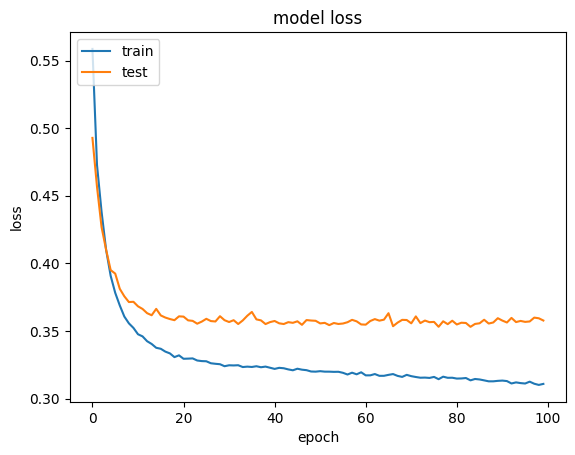

In [ ]:


# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 [==============================] - 0s 1ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   72],
       [ 209,  196]])

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8595